In [2]:
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
ifs = xr.open_dataset("https://data.source.coop/aldenks/ifs-dynamical/analysis/v0.1.0.zarr", engine="zarr", chunks={})
gfs = xr.open_dataset("https://data.source.coop/aldenks/gfs-dynamical/analysis/v0.1.0.zarr", engine="zarr", chunks={})

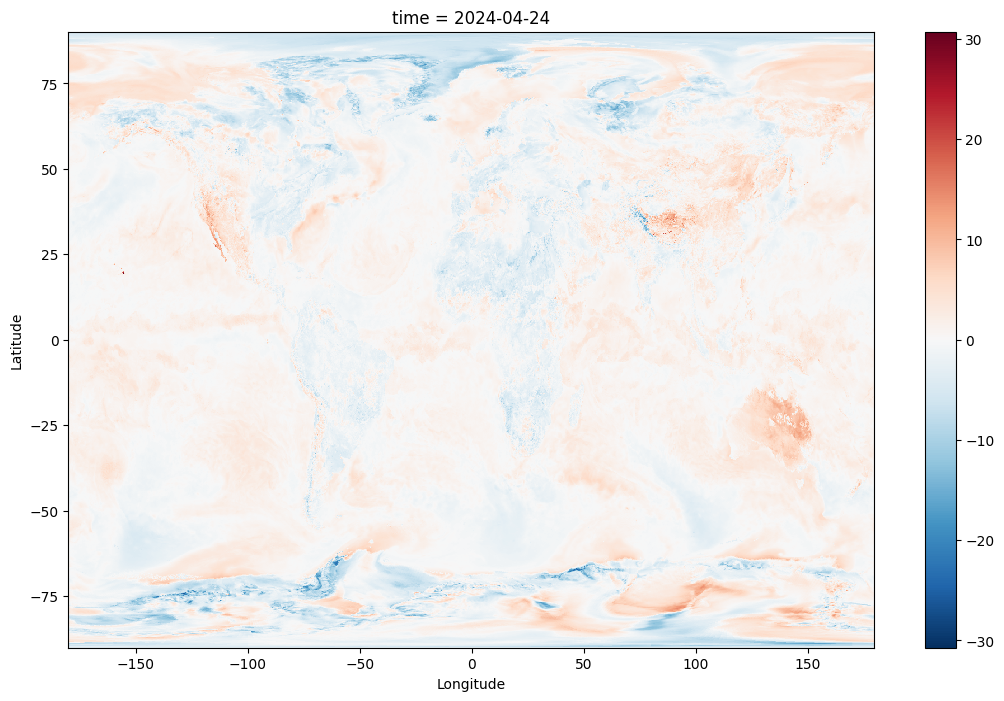

In [4]:
temperature_difference = gfs['temperature_surface'] - ifs['temperature_2m'] 

temperature_difference \
  .sel(time='2024-04-24T00:00') \
  .plot(figsize=(13, 8))

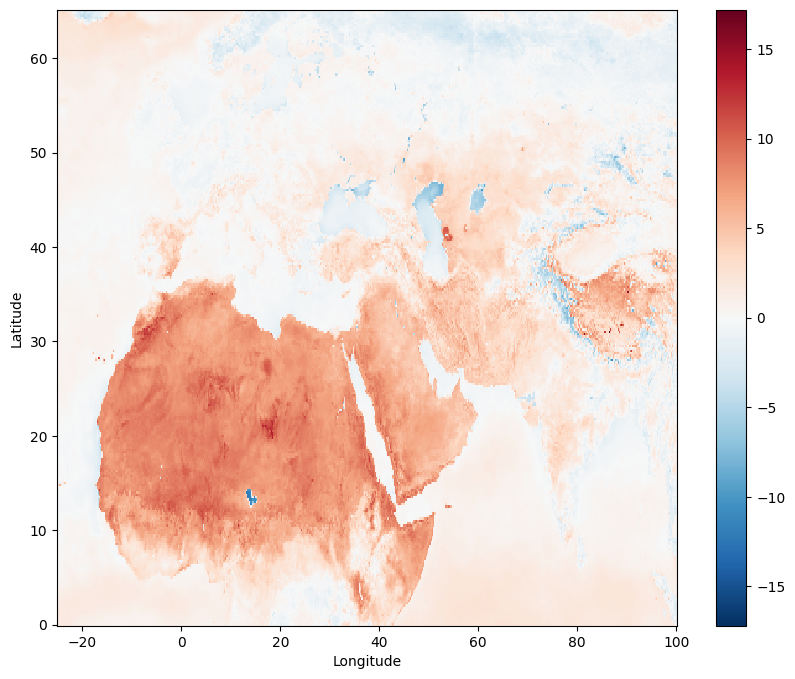

In [5]:
temperature_difference = gfs['temperature_surface'] - ifs['temperature_2m']
(
    temperature_difference
      .sel(
          time='2024-04',
          longitude=slice(-25, 100),
          latitude=slice(65, 0)
      )
      .mean(dim='time')
      .plot(figsize=(10, 8))
)

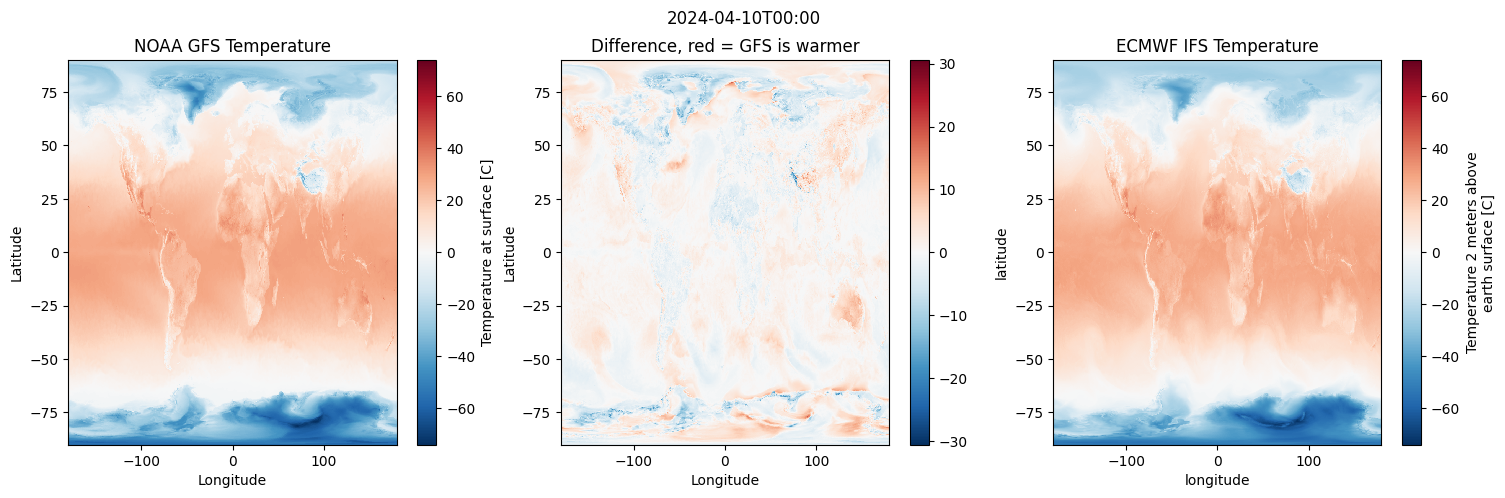

In [10]:
timestamp = '2024-04-10T00:00'
gfs_temp = gfs['temperature_surface'].sel(time=timestamp)
ifs_temp = ifs['temperature_2m'].sel(time=timestamp)

fig, axes = plt.subplots(ncols=3, figsize=(18, 5))
fig.suptitle(timestamp)

plot_data = [
    (gfs_temp, "NOAA GFS Temperature"),
    (gfs_temp - ifs_temp, "Difference, red = GFS is warmer"),
    (ifs_temp, "ECMWF IFS Temperature"),
]

for i, (data, title) in enumerate(plot_data):
    data.plot(ax=axes[i])
    axes[i].set_title(title)